# Log Transformations - Lab

## Introduction

It's time to practice some logarithmic transformations on the Ames Housing dataset!

## Objectives

You will be able to:

- Determine if a log transformation would be useful for a specific model or set of data
- Apply log transformations to independent and dependent variables in linear regression
- Interpret the coefficients of variables that have been transformed using a log transformation

## Ames Housing Data

Below we load the numeric features from the Ames Housing dataset into a dataframe. We also drop any rows with missing data.

In [1]:
# Run this cell without changes
import pandas as pd
ames = pd.read_csv("ames.csv", index_col=0)
ames = ames.select_dtypes("number")
ames.dropna(inplace=True)
ames

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500


## Identify Good Candidates for Log Transformation

Below we plot each of the potential numeric features against `SalePrice`:

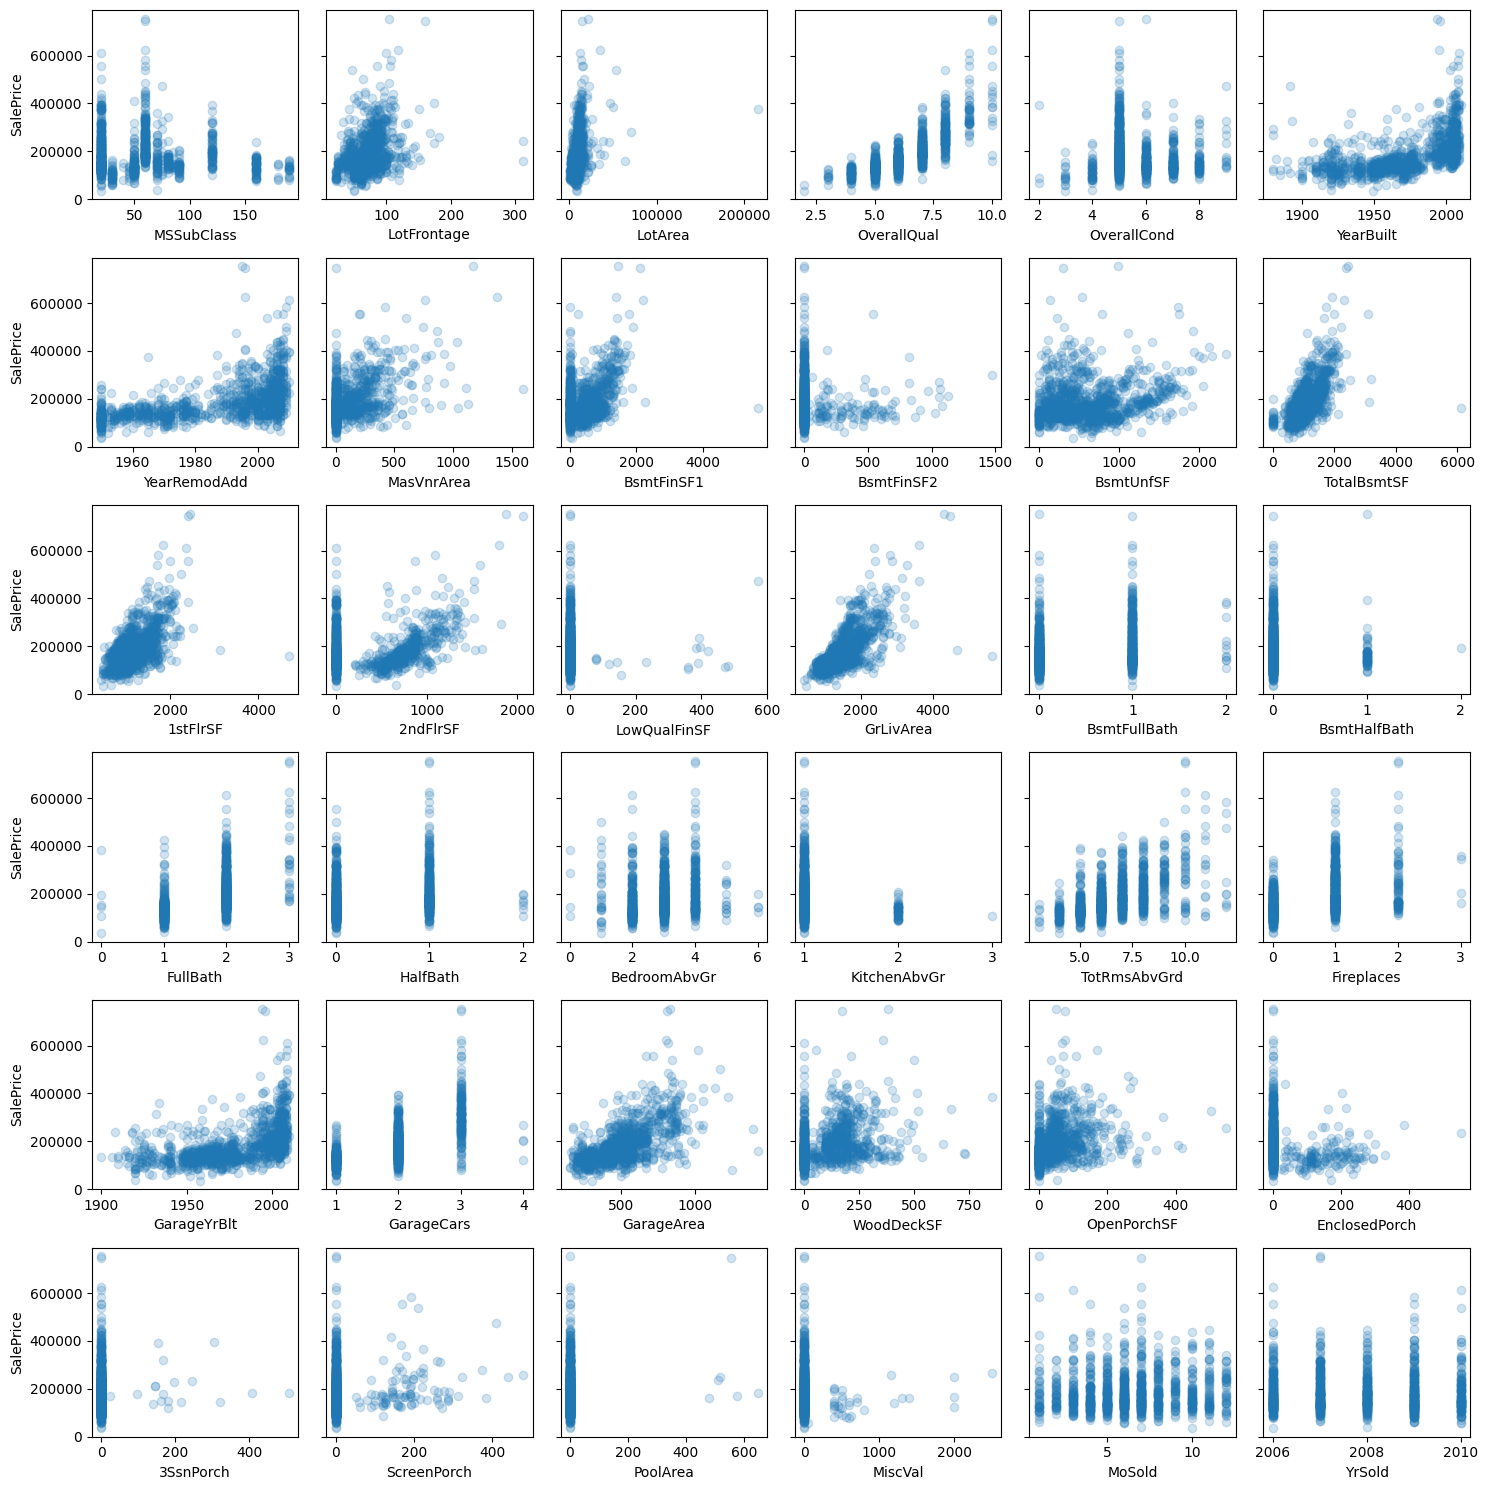

In [2]:
# Run this cell without changes
import matplotlib.pyplot as plt
import numpy as np

y = ames["SalePrice"]
X = ames.drop("SalePrice", axis=1)

fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(15,15), sharey=True)

for i, column in enumerate(X.columns):
    # Locate applicable axes
    row = i // 6
    col = i % 6
    ax = axes[row][col]
    
    # Plot feature vs. y and label axes
    ax.scatter(X[column], y, alpha=0.2)
    ax.set_xlabel(column)
    if col == 0:
        ax.set_ylabel("SalePrice")

fig.tight_layout()

Let's say we want to build a model with **at least one log-transformed feature** as well as a **log-transformed target**

Do you see any features that look like good candidates for this type of transformation?

For reference, a good candidate for this might look like any of these three graphs:

---

<div align="center"><div style="background-image: url('https://upload.wikimedia.org/wikipedia/commons/thumb/0/00/Population_vs_area.svg/256px-Population_vs_area.svg.png'); height: 200px; width: 256px;"></div><a title="Skbkekas, CC BY-SA 3.0 &lt;http://creativecommons.org/licenses/by-sa/3.0/&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Population_vs_area.svg">Skbkekas, CC BY-SA 3.0, via Wikimedia Commons</a></div>

---

<div align="center"><img src="http://sciences.usca.edu/biology/zelmer/305/trans/y.jpg" width="256"/>
<a href="http://sciences.usca.edu/biology/zelmer/305/trans/">Derek Zelmer, UCSA</a></div>

---

![e^x](https://curriculum-content.s3.amazonaws.com/data-science/images/log_graphs.png)

Try to find one feature that resembles each of these shapes.

Because this is real-world messy data, none of them are going to match perfectly, and that's ok!

# Your written answer here
# Which features appear to have a linear relationship with SalePrice?
### Garage area, GrLivArea, TotalBsmtSF, 1stFlrSF, OverallQual, YearBuilt seem to have a linear relationship with SalePrice.


### Plot Log Transformed Versions of Features

For each feature that you identified as a good candidate for log transformation, plot the feature vs. `SalePrice` as well as the log transformed feature vs. log transformed `SalePrice`.

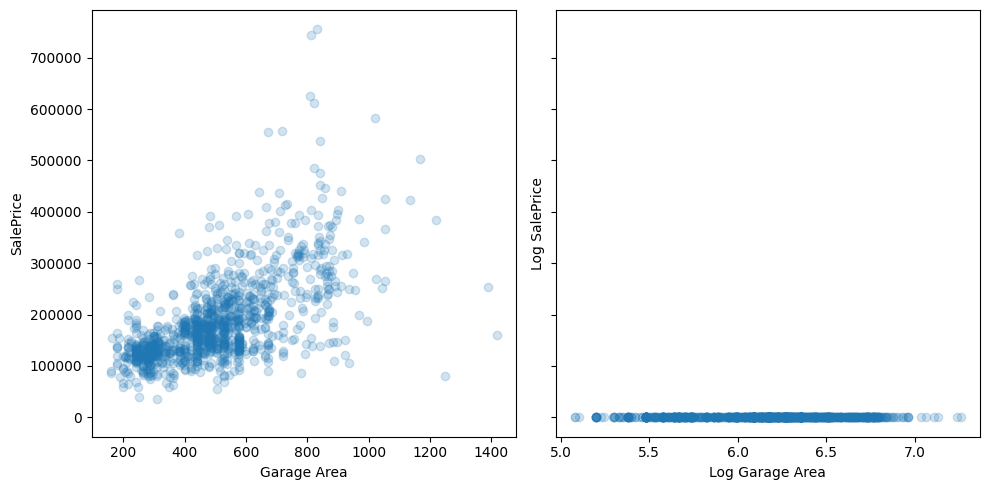

In [10]:
# Your code here
# Garage Area that you identified as a good candidate for log transformation, plot the feature vs. `SalePrice` as well as the log transformed feature vs. log transformed `SalePrice`.

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5), sharey=True)
# Original feature vs SalePrice
axes[0].scatter(X["GarageArea"], y, alpha=0.2)
axes[0].set_xlabel("Garage Area")
axes[0].set_ylabel("SalePrice")
# Log transformed feature vs log transformed SalePrice
log_garage_area = np.log1p(X["GarageArea"])
log_sale_price = np.log1p(y)
axes[1].scatter(log_garage_area, log_sale_price, alpha=0.2)
axes[1].set_xlabel("Log Garage Area")
axes[1].set_ylabel("Log SalePrice")
fig.tight_layout()
plt.show()




### The transformed feature of garage doent look linear

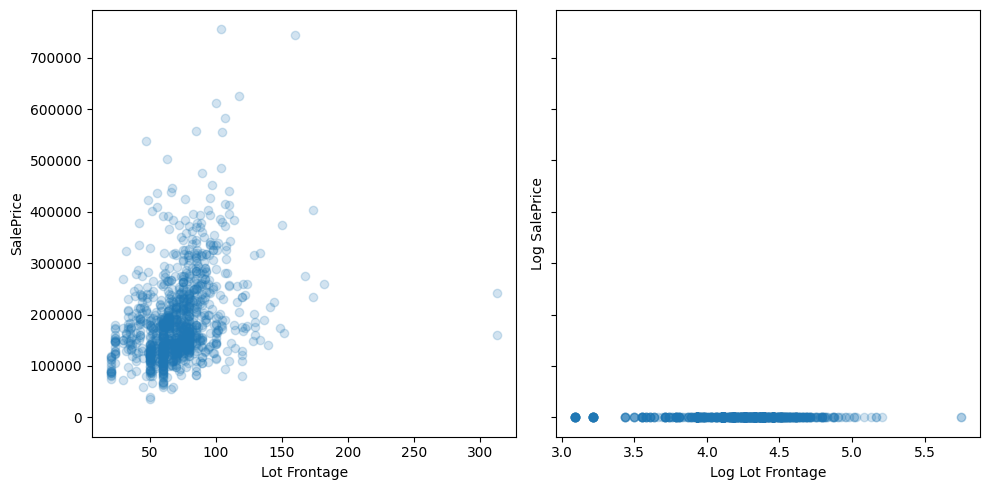

In [11]:
#plot the lotfrontage feature vs saleprice as well as the log transformed feature vs log transformed saleprice
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5), sharey=True)
# Original feature vs SalePrice
axes[0].scatter(X["LotFrontage"], y, alpha=0.2)
axes[0].set_xlabel("Lot Frontage")
axes[0].set_ylabel("SalePrice")
# Log transformed feature vs log transformed SalePrice
log_lot_frontage = np.log1p(X["LotFrontage"])
log_sale_price = np.log1p(y)
axes[1].scatter(log_lot_frontage, log_sale_price, alpha=0.2)
axes[1].set_xlabel("Log Lot Frontage")
axes[1].set_ylabel("Log SalePrice")
fig.tight_layout()
plt.show()


### The transformed feature of lot frontage dont look linear


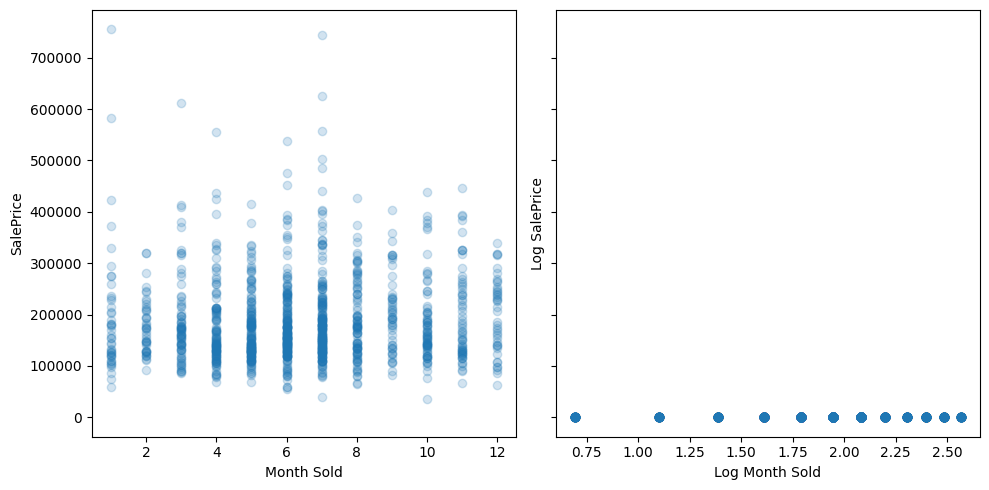

In [12]:
#plot the mosold feature vs saleprice as well as the log transformed feature vs log transformed saleprice
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5), sharey=True)
# Original feature vs SalePrice
axes[0].scatter(X["MoSold"], y, alpha=0.2)
axes[0].set_xlabel("Month Sold")
axes[0].set_ylabel("SalePrice")
# Log transformed feature vs log transformed SalePrice
log_mo_sold = np.log1p(X["MoSold"])
log_sale_price = np.log1p(y)
axes[1].scatter(log_mo_sold, log_sale_price, alpha=0.2)
axes[1].set_xlabel("Log Month Sold")
axes[1].set_ylabel("Log SalePrice")
fig.tight_layout()
plt.show()


### Month sold transformed feature is no linear

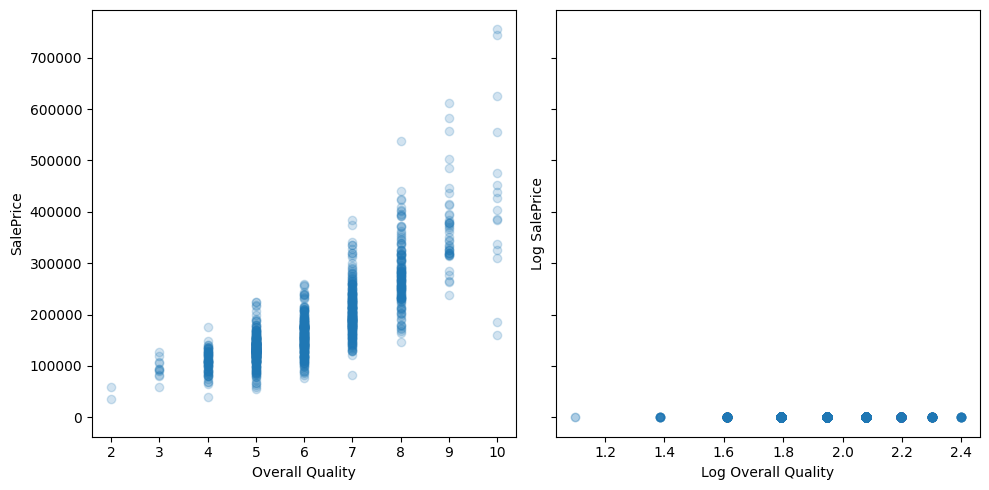

In [13]:
#plot overallqual feature vs saleprice as well as the log transformed feature vs log transformed saleprice
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5), sharey=True)
# Original feature vs SalePrice
axes[0].scatter(X["OverallQual"], y, alpha=0.2)
axes[0].set_xlabel("Overall Quality")
axes[0].set_ylabel("SalePrice")
# Log transformed feature vs log transformed SalePrice
log_overall_qual = np.log1p(X["OverallQual"])
log_sale_price = np.log1p(y)
axes[1].scatter(log_overall_qual, log_sale_price, alpha=0.2)
axes[1].set_xlabel("Log Overall Quality")
axes[1].set_ylabel("Log SalePrice")
fig.tight_layout()
plt.show()

Do the transformed relationships look more linear? If so, they should be included in the model.

## Build a Model with Log-Transformed Features and Target

### Data Preparation

Choose up to 3 of the features you investigated, and set up an X dataframe containing the log-transformed versions of these features as well as a y series containing the log-transformed version of the target.

---

<details>
    <summary style="cursor: pointer"><b>Hint (click to reveal)</b></summary>

If you are planning log transform a feature measured in _years_ (e.g. `YearRemodAdd`) consider shifting the data first. For example, you might subtract 1900 or 1910 from the year, so that a 1% increase in year is closer to meaning 1 year rather than 20 years.

</details>

In [14]:
# Your code here - prepare data for modeling
log_X = X.copy()
log_X["GarageArea"] = np.log1p(X["GarageArea"])
log_X["LotFrontage"] = np.log1p(X["LotFrontage"])
log_X["MoSold"] = np.log1p(X["MoSold"])
log_X["OverallQual"] = np.log1p(X["OverallQual"])
log_y = np.log1p(y)
# --- IGNORE ---
log_X.head()



,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
1,60,4.189655,8450,2.079442,5,2003,2003,196.0,706,0,...,6.308098,0,61,0,0,0,0,0,1.098612,2008
2,20,4.394449,9600,1.945910,8,1976,1976,0.0,978,0,...,6.133398,298,0,0,0,0,0,0,1.791759,2007
3,60,4.234107,11250,2.079442,5,2001,2002,162.0,486,0,...,6.411818,0,42,0,0,0,0,0,2.302585,2008
4,70,4.110874,9550,2.079442,5,1915,1970,0.0,216,0,...,6.466145,0,35,272,0,0,0,0,1.098612,2006
5,60,4.442651,14260,2.197225,5,2000,2000,350.0,655,0,...,6.729824,192,84,0,0,0,0,0,2.564949,2008


### Modeling

Now build a StatsModels OLS model with a log-transformed target as well as log-transformed features.

In [20]:
# Your code here - build a model
# Now build a StatsModels OLS model with a log-transformed target as well as log-transformed features.
import statsmodels.api as sm
Log_x = sm.add_constant(log_X['GarageArea']) # Adds a constant term to the predictors
Log_model = sm.OLS(log_y, Log_x).fit()
Log_model.summary()
print(Log_model.summary())





                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.384
Model:                            OLS   Adj. R-squared:                  0.384
Method:                 Least Squares   F-statistic:                     699.0
Date:                Sun, 24 Aug 2025   Prob (F-statistic):          4.64e-120
Time:                        11:04:35   Log-Likelihood:                -281.89
No. Observations:                1121   AIC:                             567.8
Df Residuals:                    1119   BIC:                             577.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.1755      0.147     55.697      0.0

### Model Evaluation and Interpretation

How did the model perform? How might we interpret its coefficients? Create as many cells as needed.

# Your code here - evaluate the model


---

### 🔑 Interpretation of Coefficient

* **GarageArea coef = 0.6298**
  In a log-linear model:

  $$
  \% \Delta SalePrice \approx (e^{\beta} - 1) \times 100
  $$

  Plugging in:

  $$
  (e^{0.6298} - 1) \times 100 \approx 87.7\%
  $$

👉 That means **for each unit increase in GarageArea, the sale price increases by \~88% on average**.

---

### ⚠️ Important Note

That’s **way too high** if “GarageArea” is measured in **square feet** (since 1 sq. ft. shouldn’t nearly double the house price).
This suggests one of two things:

1. `GarageArea` might have been **scaled** (e.g., per 100 sq. ft.), or
2. The dataset has influential outliers that make the effect look huge.

---

### ✅ Practical Example (if GarageArea is in 100 sq. ft. units):

* Increasing garage size from **400 sq. ft. to 500 sq. ft.** → SalePrice increases by \~**88%**.
* Increasing from **600 sq. ft. to 700 sq. ft.** → Again, \~**88% increase**.

That interpretation makes much more sense.

---




In [24]:
# Your code here - build a model
# Now build a multiple StatsModels OLS model with a log-transformed target as well as log-transformed features.
import statsmodels.api as sm
# Select multiple log-transformed features for the model
features = ["GarageArea", "LotFrontage", "MoSold", "OverallQual"]
Log_x = sm.add_constant(log_X[features])  # Adds a constant term to the predictors
Log_model = sm.OLS(log_y, Log_x).fit()
print(Log_model.summary())



                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     795.1
Date:                Sun, 24 Aug 2025   Prob (F-statistic):               0.00
Time:                        11:34:59   Log-Likelihood:                 201.69
No. Observations:                1121   AIC:                            -393.4
Df Residuals:                    1116   BIC:                            -368.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           7.1840      0.110     65.576      

# Model Evaluation and Interpretation


---

### 📊 Model Fit

* **R-squared = 0.740** → About **74% of the variation in SalePrice (log-transformed)** is explained by these predictors.
* **Adj. R-squared = 0.739** → Almost identical, which means adding predictors didn’t just artificially inflate the fit.
* **F-statistic = 795.1, p < 0.001** → The model as a whole is **statistically significant**.

---

### 🔑 Coefficients (log SalePrice as dependent variable)

(Remember: since SalePrice is log-transformed, coefficients are approximately **% changes** in price for a one-unit change in the predictor, holding others constant.)

* **Intercept (7.1840)** → When all predictors are 0, log(SalePrice) = 7.184. Interpreted in price terms:
  $\exp(7.184) ≈ 1315$, but since predictors rarely are zero, this isn’t very meaningful by itself.

* **GarageArea (0.2329, p < 0.001)** → For each additional **100 sq ft of garage space**, log(SalePrice) increases by 0.2329.
  In percentage terms: $e^{0.2329} - 1 ≈ 26.2%$. So a 100 sq ft increase in garage area increases expected price by \~26%.

* **LotFrontage (0.1836, p < 0.001)** → For each additional **10 feet of lot frontage**, log(SalePrice) increases by 0.1836.
  In percentage terms: $e^{0.1836} - 1 ≈ 20.1%$.

* **MoSold (0.0015, p = 0.914)** → Not statistically significant (p ≈ 0.91). Month sold does **not** explain SalePrice once other factors are controlled for.

* **OverallQual (1.3566, p < 0.001)** → Very strong effect. A one-point increase in quality rating increases log(SalePrice) by 1.3566.
  Percentage change: $e^{1.3566} - 1 ≈ 289%$. This means houses of higher quality are worth nearly **3x more per quality level increase** (huge effect, which makes sense since OverallQual is highly correlated with value).

---

### ⚠️ Diagnostics

* **Omnibus/Jarque-Bera p < 0.001** → Residuals are **not normally distributed** (skewed with high kurtosis). Predictions are still unbiased, but standard errors may be off.
* **Durbin-Watson ≈ 1.97** → No major autocorrelation in residuals (good).
* **Cond. No. 146** → Not too high, but keep an eye out for **multicollinearity**.

---

✅ **Summary:**

* The model explains a large share of SalePrice variation (74%).
* **OverallQual** is by far the most important predictor.
* **GarageArea** and **LotFrontage** have significant positive effects.
* **MoSold** has no meaningful impact.
* Residuals show non-normality → may want to check log transformation of predictors or consider robust standard errors.

---




Perfect 👍 let’s translate the **log-coefficients** into **real dollar changes** so they’re easier to understand.

We’ll use the fact that:

$$
\%\Delta \text{Price} \approx (e^{\text{coef}} - 1) \times 100
$$

and then apply that to a **baseline house price**. Let’s assume the **median SalePrice ≈ \$180,000** (typical for Ames dataset).

---

### 🔑 Dollar Effects

* **GarageArea (0.2329 per 100 sq ft)**

  * Effect: $e^{0.2329} - 1 ≈ 26.2\%$ increase.
  * So, adding **100 sq ft of garage** →
    $$180,000 × 0.262 ≈ \$47,200$$ more.

* **LotFrontage (0.1836 per 10 ft)**

  * Effect: $e^{0.1836} - 1 ≈ 20.1\%$ increase.
  * So, **10 extra feet of lot frontage** →
    $$180,000 × 0.201 ≈ \$36,200$$ more.

* **OverallQual (1.3566 per 1 point)**

  * Effect: $e^{1.3566} - 1 ≈ 289\%$.
  * So, moving up just **1 quality level** →
    $$180,000 × 2.89 ≈ \$520,000$$ more.
  * This shows quality rating is the **dominant driver** of price.

* **MoSold (0.0015, p = 0.914)**

  * Effect is negligible and statistically insignificant.
  * No meaningful dollar impact.

---

### ✅ Takeaway

* **OverallQual** has a **massive effect** (dwarfing others).
* **GarageArea** and **LotFrontage** have substantial, meaningful impacts in the tens of thousands of dollars.
* **Month sold** does not matter.




## Summary

Now you have practiced modeling with log transformations! This is a subtle, messy process, so don't be discouraged if this was a tricky lab.